In [3]:
import zipfile

zip_file = "digit-recognizer.zip"  # Change this to your actual file name

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall("digit-recognizer")  # Extracts to a new folder

print("Unzipping complete!")


Unzipping complete!


In [9]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt 

In [10]:
data = pd.read_csv('digit-recognizer/train.csv')

In [11]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
print("First 10 labels:", data[:10, 0]) 

First 10 labels: [2 7 9 3 0 2 3 1 0 8]


In [63]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)


X_dev = data[:1000, 1:].T / 255.0  
Y_dev = data[:1000, 0].astype(int)  


X_train = data[1000:, 1:].T / 255.0
Y_train = data[1000:, 0].astype(int)


In [64]:
print("Unique labels in Y_train:", np.unique(Y_train))
print("Label counts:", np.bincount(Y_train))

Unique labels in Y_train: [0 1 2 3 4 5 6 7 8 9]
Label counts: [4039 4560 4083 4256 3981 3707 4017 4313 3964 4080]


In [76]:
# After loading data:
print("X_train shape:", X_train.shape) 
print("Y_train shape:", Y_train.shape)  
print("Pixel range:", np.min(X_train), np.max(X_train))  

X_train shape: (784, 41000)
Y_train shape: (41000,)
Pixel range: 0.0 1.0


In [73]:
print("First 10 labels:", _train[:10, ])

First 10 labels: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [74]:
def init_params():
    W1 = np.random.randn(10, 784) * np.sqrt(2. / 784)  #Weight initialization
    b1 = np.zeros((10, 1))
    W2 = np.random.randn(10, 10) * np.sqrt(2. / 10)
    b2 = np.zeros((10, 1))
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def Softmax(Z):
    shift_Z = Z - np.max(Z, axis=0, keepdims=True)
    exp = np.exp(shift_Z)
    return exp / exp.sum(axis=0, keepdims=True)
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = Softmax(Z2)
    return Z1, A1, Z2, A2 

def one_hot(Y):
    Y = Y.astype(int)
    one_hot_Y = np.zeros((Y.size, 10))  
    one_hot_Y[np.arange(Y.size), Y] = 1
    return one_hot_Y.T  

def deriv_ReLU(Z):
    return Z > 0 

def back_prop(Z1, A1, Z2, A2, W2, X, Y):
    one_hot_Y = one_hot(Y)
    m = X.shape[1]
    dZ2 = A2 - one_hot_Y
    dW2 = (1/m) * dZ2.dot(A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)  
    dZ1 = W2.T.dot(dZ2) * (Z1 > 0)  
    dW1 = (1/m) * dZ1.dot(X.T)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)  
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [75]:

import sys

def get_predictions(A2):
    return np.argmax(A2, axis=0)

def get_accuracy(predictions, Y):
    print(f"Predictions (first 10): {predictions[:10]}")
    print(f"Y (first 10): {Y[:10]}")
    accuracy = np.mean(predictions == Y)
    return accuracy

def gradient_descent(X, Y, alpha, iterations=500):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W2, X, Y)
        # Learning rate decay
        current_alpha = alpha * (1 - i/iterations)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, current_alpha)
        
        if i % 10 == 0:
            predictions = get_predictions(A2)
            accuracy = get_accuracy(predictions, Y)
            print(f"Iteration {i}: Accuracy = {accuracy:.4f}")
    
    return W1, b1, W2, b2


In [77]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.1, 1000)  


Predictions (first 10): [0 8 5 1 0 1 6 6 8 0]
Y (first 10): [8 0 2 4 9 7 0 9 1 8]
Iteration 0: Accuracy = 0.0583
Predictions (first 10): [1 0 2 4 7 1 0 8 1 1]
Y (first 10): [8 0 2 4 9 7 0 9 1 8]
Iteration 10: Accuracy = 0.4738
Predictions (first 10): [1 0 2 4 7 1 0 8 1 8]
Y (first 10): [8 0 2 4 9 7 0 9 1 8]
Iteration 20: Accuracy = 0.5773
Predictions (first 10): [1 0 2 4 9 9 0 4 1 8]
Y (first 10): [8 0 2 4 9 7 0 9 1 8]
Iteration 30: Accuracy = 0.6821
Predictions (first 10): [8 0 2 4 9 9 0 4 1 8]
Y (first 10): [8 0 2 4 9 7 0 9 1 8]
Iteration 40: Accuracy = 0.7473
Predictions (first 10): [8 0 2 4 9 9 0 9 1 8]
Y (first 10): [8 0 2 4 9 7 0 9 1 8]
Iteration 50: Accuracy = 0.7771
Predictions (first 10): [8 0 2 4 9 9 0 9 1 8]
Y (first 10): [8 0 2 4 9 7 0 9 1 8]
Iteration 60: Accuracy = 0.7964
Predictions (first 10): [8 0 2 4 9 9 0 9 1 8]
Y (first 10): [8 0 2 4 9 7 0 9 1 8]
Iteration 70: Accuracy = 0.8114
Predictions (first 10): [8 0 2 4 9 9 0 9 1 8]
Y (first 10): [8 0 2 4 9 7 0 9 1 8]
Iterati

In [78]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [8]
Label:  8


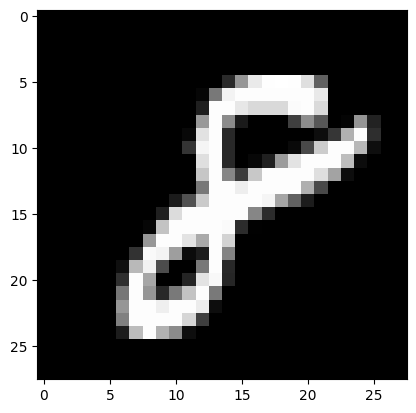

Prediction:  [0]
Label:  0


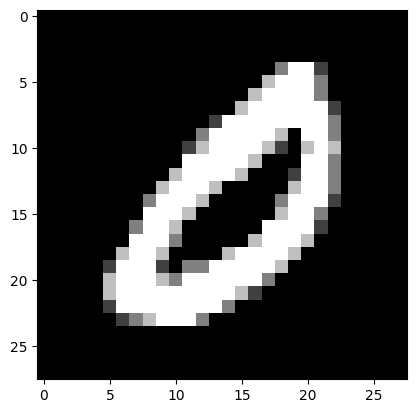

Prediction:  [2]
Label:  2


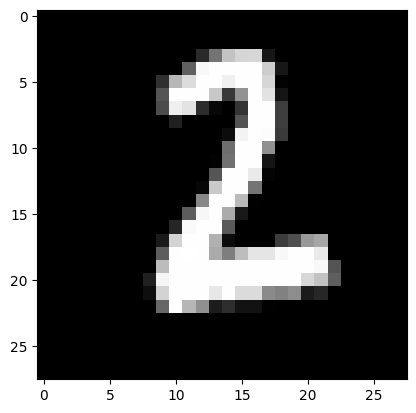

Prediction:  [4]
Label:  4


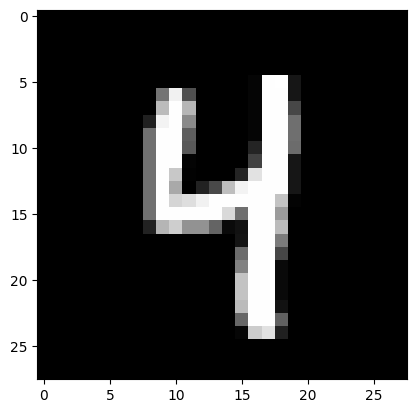

In [79]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

Prediction:  [6]
Label:  6


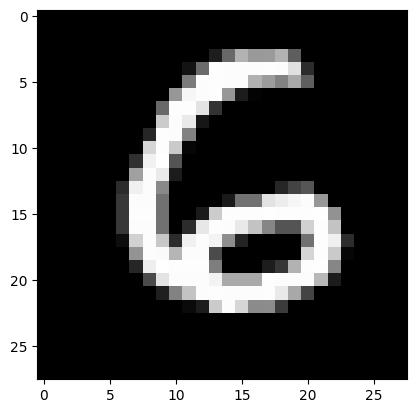

In [82]:
test_prediction(446, W1, b1, W2, b2)

In [80]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

Predictions (first 10): [0 5 1 3 1 5 8 4 6 7]
Y (first 10): [0 5 1 3 1 3 8 4 6 7]


np.float64(0.906)